In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from scipy.ndimage import label, center_of_mass
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


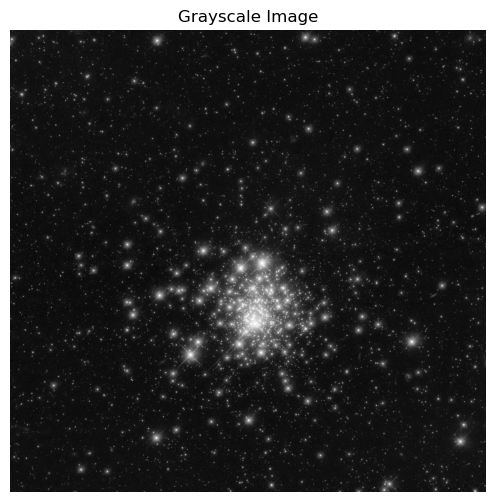

Image Dimensions: (3815, 3930)
Pixel Intensity Range: 8 to 255


In [3]:
image_path = 'potw2036a.tif'
tiff_image = Image.open(image_path)
grayscale_image = tiff_image.convert("L")
image_array = np.array(grayscale_image)

plt.figure(figsize=(8, 6))
plt.title("Grayscale Image")
plt.imshow(image_array, cmap='gray')
plt.axis("off")
plt.show()

# Check image dimensions and intensity range
print(f"Image Dimensions: {image_array.shape}")
print(f"Pixel Intensity Range: {image_array.min()} to {image_array.max()}")


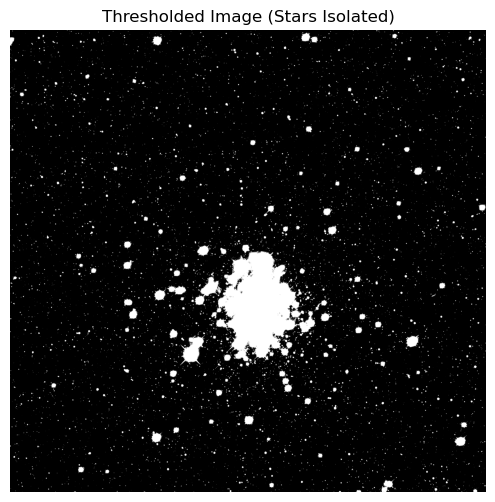

In [4]:
threshold_value = threshold_otsu(image_array)
binary_image = image_array > threshold_value

plt.figure(figsize=(8, 6))
plt.title("Thresholded Image (Stars Isolated)")
plt.imshow(binary_image, cmap='gray')
plt.axis("off")
plt.show()


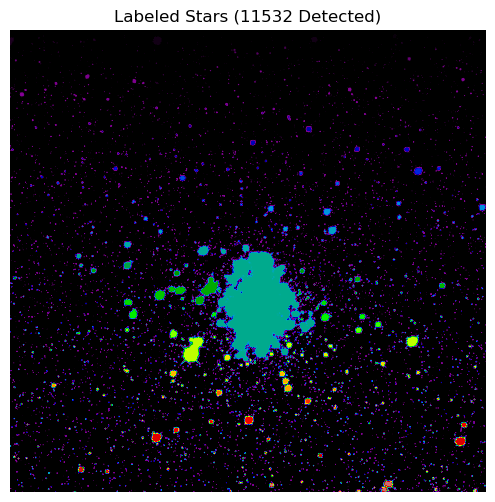

Number of Stars Detected: 11532


In [5]:
labeled_image, num_features = label(binary_image)
plt.figure(figsize=(8, 6))
plt.title(f"Labeled Stars ({num_features} Detected)")
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.axis("off")
plt.show()

print(f"Number of Stars Detected: {num_features}")


In [6]:
centroids = center_of_mass(image_array, labeled_image, range(1, num_features + 1))
brightness = [np.mean(image_array[labeled_image == i]) for i in range(1, num_features + 1)]
features = np.array([[c[0], c[1], b] for c, b in zip(centroids, brightness)])
print(f"Extracted Features: {features.shape}")


Extracted Features: (11532, 3)


In [7]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)


In [24]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  
labels = dbscan.fit_predict(normalized_features)
features_with_labels = np.column_stack((features, labels))


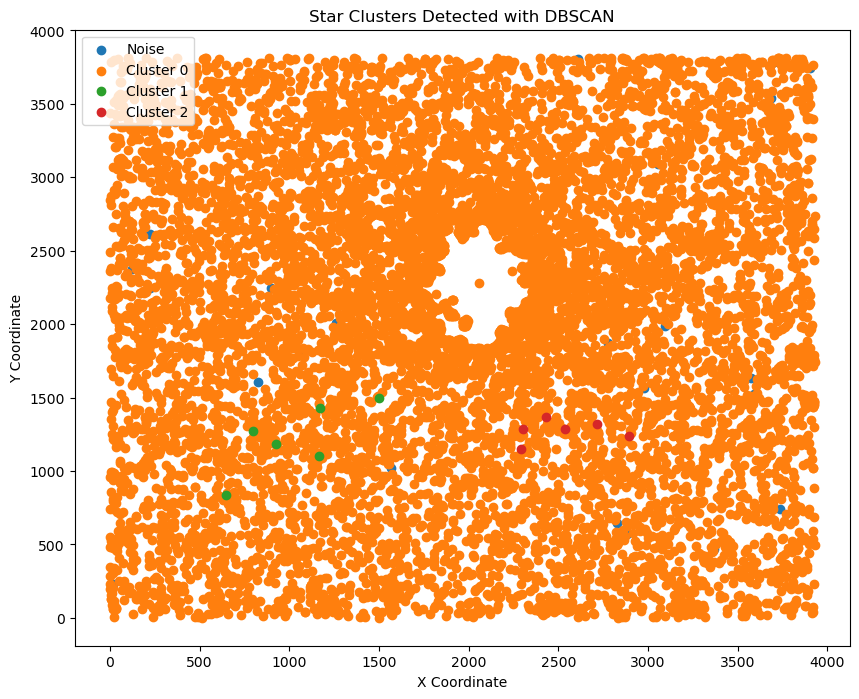

In [ ]:
plt.figure(figsize=(10, 8))
for cluster_label in np.unique(labels):
    cluster_points = features[labels == cluster_label]
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], label=f"Cluster {cluster_label}" if cluster_label != -1 else "Noise")
plt.title("Star Clusters Detected with DBSCAN")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.show()


In [26]:
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of Clusters Detected: {num_clusters}")
for cluster_label in range(num_clusters):
    cluster_data = features[labels == cluster_label]
    print(f"Cluster {cluster_label}: {len(cluster_data)} stars")


Number of Clusters Detected: 3
Cluster 0: 11492 stars
Cluster 1: 6 stars
Cluster 2: 6 stars
